In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("../csv/abalone.csv",
                 index_col=None,
                 names=["Sex","Length","Diam","Height","Whole","Shucked","Viscera","Shell","Rings"])
# remove infants!
df = df[df["Sex"] != -1]

In [3]:
df.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [4]:
%matplotlib inline

(1701, 2) (1701,)


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


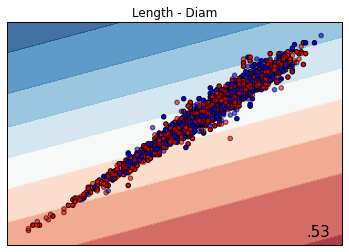

(1701, 2) (1701,)


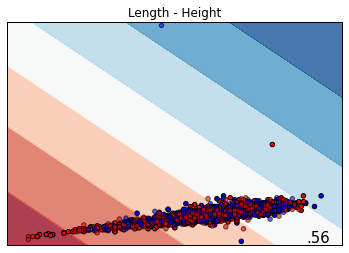

(1701, 2) (1701,)


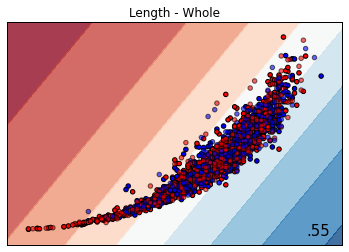

(1701, 2) (1701,)


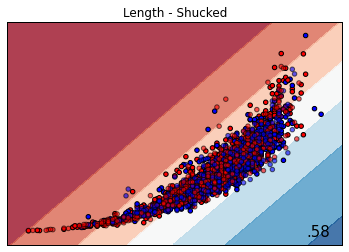

(1701, 2) (1701,)


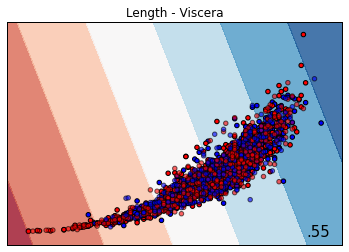

(1701, 2) (1701,)


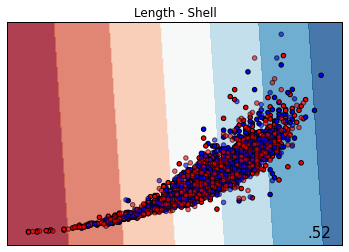

(1701, 2) (1701,)


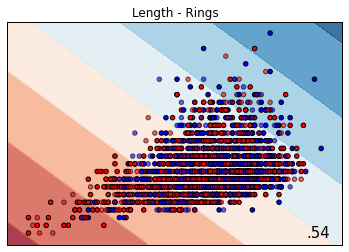

(1701, 2) (1701,)


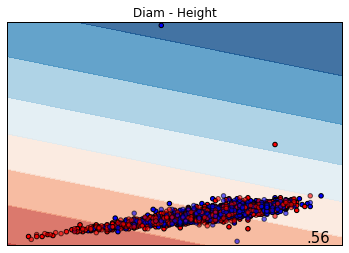

(1701, 2) (1701,)


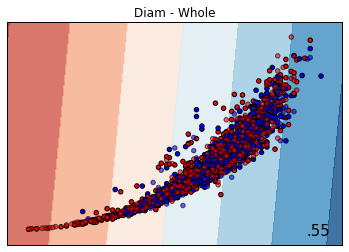

(1701, 2) (1701,)


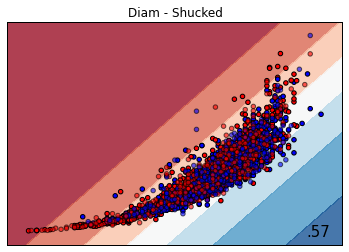

(1701, 2) (1701,)


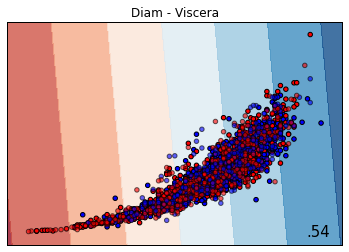

(1701, 2) (1701,)


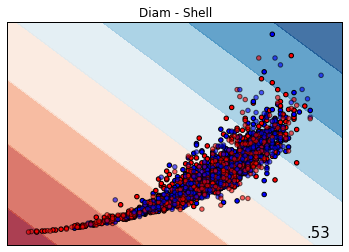

(1701, 2) (1701,)


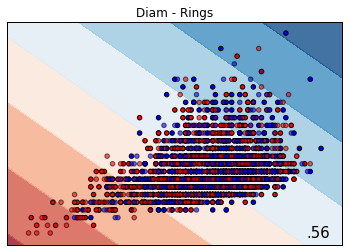

(1701, 2) (1701,)


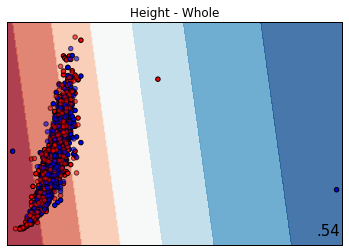

(1701, 2) (1701,)


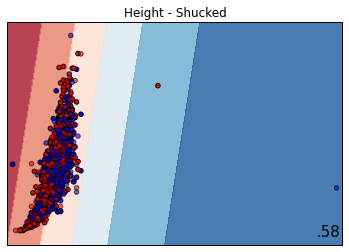

(1701, 2) (1701,)


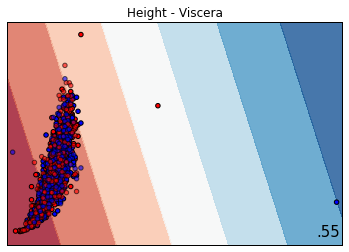

(1701, 2) (1701,)


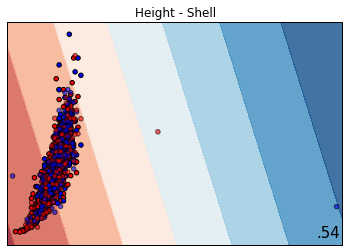

(1701, 2) (1701,)


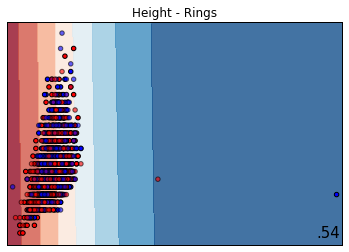

(1701, 2) (1701,)


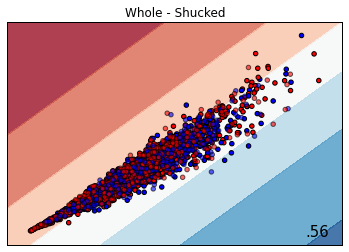

(1701, 2) (1701,)


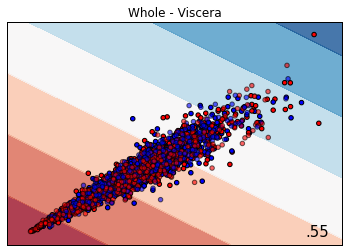

(1701, 2) (1701,)


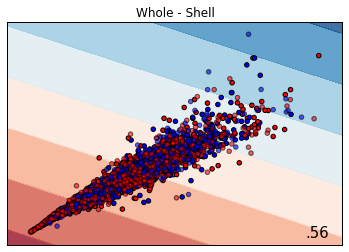

(1701, 2) (1701,)


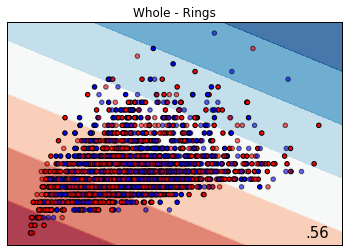

(1701, 2) (1701,)


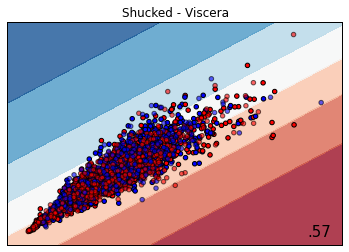

(1701, 2) (1701,)


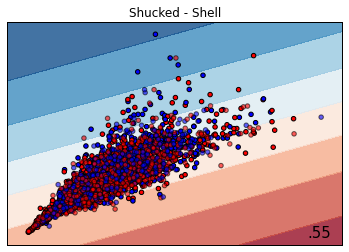

(1701, 2) (1701,)


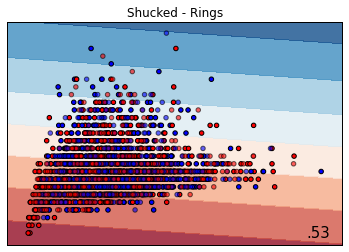

(1701, 2) (1701,)


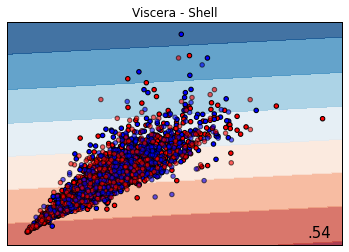

(1701, 2) (1701,)


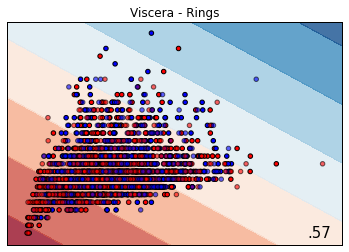

(1701, 2) (1701,)


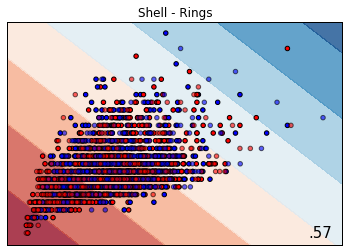

In [5]:
h = .02

cols = ["Length","Diam","Height","Whole","Shucked","Viscera","Shell","Rings"]
y = df["Sex"].as_matrix()
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        # fit classifier
        X = df[[cols[i], cols[j]]].as_matrix()
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
        clf = LogisticRegressionCV(Cs=10, cv=10, max_iter=500, n_jobs=-1)
        clf.fit(X_train,y_train)
        y_pred = clf.predict_proba(X_test)
        score = roc_auc_score(y_test, y_pred[:,1])
        
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(1, 1, 1)
        # Plot the training points
        #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # plot decision boundary
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(cols[i] + " - " + cols[j])
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        plt.show()